<a href="https://colab.research.google.com/github/RitaROK/Analysis/blob/main/COBRA_125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install uncertainties

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
from scipy.stats import chisquare, chi2
import seaborn as sns

def linear(x, a, b):
  return a*x + b

def get_color(n, basecolor):
  current_palette = sns.dark_palette(n_colors=n, color=basecolor)
  sns.palplot(current_palette)
  colors = np.zeros(n, dtype=object)
  for color in range(n):
    colors[color] = current_palette[color]
  return colors

# He-40%CF$_4$

In [ ]:
he40cf4_cobra = pd.read_csv('/content/drive/MyDrive/COBRA/Measurements/He40CF4/He40CF4.csv')
he40cf4_gem = pd.read_csv('/content/drive/MyDrive/APPLE/UVis/He-40%CF4+0%CH4/UVis fits - He-40%CF4+0%CH4.csv')
he40cf4_cobra.describe()

,LAAPD [V],I-mesh [V],Anode [V],Cathode [V],Top [V],D-Mesh [V],Holes [V],Strips [V],COBRA [V],AND_CH,...,EL_dERES,EL_AMP,I [nA],EL_Ratio,CAT electrons,dCAT electrons,AND electrons,AND delectrons,EL yield,dEL yield
count,72.0,72.0,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,24.000000,...,72.000000,72.000000,72.000000,72.000000,2.800000e+01,2.800000e+01,2.400000e+01,2.400000e+01,72.000000,72.000000
mean,1750.0,-130.0,-40.0,-187.500000,-875.000000,-1125.000000,687.500000,147.500000,835.000000,507.450000,...,0.586806,70.902778,191.951389,24.177335,1.059702e+07,5.310680e+05,2.990843e+07,1.496778e+06,65732.294414,4651.873210
std,0.0,0.0,0.0,136.513426,134.415794,134.415794,24.709581,136.513426,134.415794,159.904278,...,0.251193,61.828513,4.876763,23.365159,7.050709e+06,3.519017e+05,2.066028e+07,1.033295e+06,63524.184532,4494.823744
min,1750.0,-130.0,-40.0,-470.000000,-1130.000000,-1380.000000,650.000000,-30.000000,620.000000,220.900000,...,0.350000,5.000000,185.500000,2.554447,1.936552e+06,9.723340e+04,5.503197e+06,2.755656e+05,6944.921272,491.325764
25%,1750.0,-130.0,-40.0,-295.000000,-990.000000,-1240.000000,660.000000,25.000000,710.000000,425.425000,...,0.400000,20.000000,186.500000,8.720989,4.557588e+06,2.279622e+05,1.407065e+07,7.055881e+05,23710.248158,1678.525791
50%,1750.0,-130.0,-40.0,-180.000000,-870.000000,-1120.000000,690.000000,140.000000,830.000000,486.050000,...,0.500000,50.000000,192.000000,16.961054,8.977631e+06,4.491563e+05,2.325095e+07,1.163783e+06,46112.980911,3266.274282
75%,1750.0,-130.0,-40.0,-65.000000,-750.000000,-1000.000000,720.000000,255.000000,950.000000,590.875000,...,0.600000,100.000000,194.500000,31.148421,1.667691e+07,8.340070e+05,4.321592e+07,2.162989e+06,84684.983318,5997.470039
max,1750.0,-130.0,-40.0,-10.000000,-660.000000,-910.000000,730.000000,430.000000,1090.000000,830.900000,...,1.800000,200.000000,201.000000,102.989662,2.655678e+07,1.328369e+06,8.279958e+07,4.141705e+06,280003.846706,19812.448231


Slope = 0.02607+/-0.00024
Intercept =  -7.32+/-0.05
Chi2 = 2.852090841015895e-05 P-value = 0.9957389201364981
Maximum chi value: 14.067140449340169
HIGH HOLES
Exponential:
Slope = 0.00751+/-0.00011
Intercept =  4.82+/-0.10
Chi2 = 0.0003853100607024929 P-value = 0.9843390772634022
Maximum chi value: 16.918977604620448
Linear:
Slope = 113+/-10
Intercept =  (-3.1+/-0.7)e+04
Chi2 = 167.07281019782997 P-value = 3.224970620434206e-38
Maximum chi value: 12.591587243743977


'----------------------------------------------------------------------------------------------------'

MEDIUM HOLES
Exponential:
Slope = 0.00780+/-0.00023
Intercept =  3.96+/-0.22
Chi2 = 0.003624418161901106 P-value = 0.951993844259592
Maximum chi value: 19.67513757268249
Linear:
Slope = 73+/-11
Intercept =  (-2.8+/-0.8)e+04
Chi2 = 247.43004226200117 P-value = 9.434632988330677e-56
Maximum chi value: 11.070497693516351


'----------------------------------------------------------------------------------------------------'

LOW HOLES
Exponential:
Slope = 0.00878+/-0.00028
Intercept =  2.42+/-0.27
Chi2 = 0.013936119085521084 P-value = 0.906026978106085
Maximum chi value: 23.684791304840576
Linear
Slope = 27+/-4
Intercept =  (-8.8+/-3.0)e+03
Chi2 = 299.0721009978589 P-value = 5.247232849605535e-67
Maximum chi value: 14.067140449340169


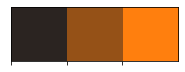

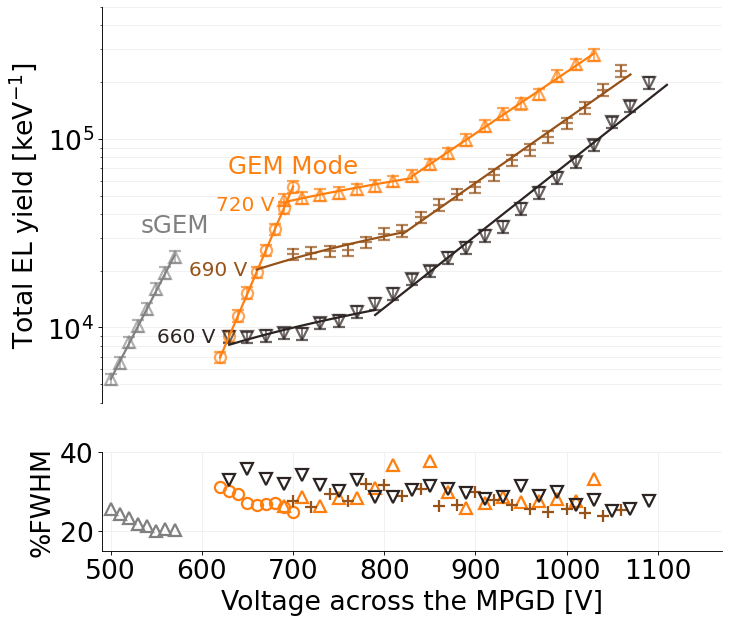

In [ ]:
#@title Light Yield

color = get_color(3, 'tab:orange')

fig, (ax) = plt.subplots(2,1,figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k', gridspec_kw={'height_ratios': [4, 1]}) 

#GEM Mode
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM'], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='GEM'], yerr=he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM']
y = np.log(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='GEM'])
popt, pcov = curve_fit(linear, x, y, p0=[1,0.01])
ycalc = np.exp(linear(np.arange(620, 705, 5), *popt))
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]*3))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(620, 705, 5), ycalc, color='tab:orange', lw=2, zorder=5)
ax[0].text(700, 6.2e4, 'GEM Mode', fontsize=22, ha='center', va='bottom', color='tab:orange')

#High Holes
print('HIGH HOLES')
print('Exponential:')
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'], 
            yerr=he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']=='HIGH'], color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)

x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH']>=830]
y = np.log(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH']>=830])
popt, pcov = curve_fit(linear, x, y, p0=[1,0.01])
ycalc = np.exp(linear(np.arange(830, 1035, 5), *popt))
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(830, 1035, 5), ycalc, color=color[2], lw=2, zorder=5)

print('Linear:')
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH']<=830]
y = he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH']<=830]
popt, pcov = curve_fit(linear, x, y, p0=[1,0.01])
ycalc = linear(np.arange(690, 835, 5), *popt)
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(690, 835, 5), ycalc, color=color[2], lw=2, zorder=5)
ax[0].text(680, 4e4, '720 V', fontsize=18, ha='right', va='bottom', color='tab:orange')

#Medium Holes
display('-'*100)
print('MEDIUM HOLES')
print('Exponential:')
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2:], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2:], 
            yerr=he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2:], color='none', marker='+', markersize=10, 
               markeredgecolor=color[1], markeredgewidth=2, ecolor=color[1], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'].loc[ he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM']>=820]
y = np.log(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM']>=820])
popt, pcov = curve_fit(linear, x, y, p0=[1,0.01])
ycalc = np.exp(linear(np.arange(820, 1075, 5), *popt))
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(820, 1075, 5), ycalc, color=color[1], lw=2, zorder=5)

print('Linear:')
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2:].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM']<=820]
y = he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2:].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM']<=820]
popt, pcov = curve_fit(linear, x, y, p0=[1,0.01])
ycalc = linear(np.arange(660, 821, 5), *popt)
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(660, 821, 5), ycalc, color=color[1], lw=2, zorder=5)
ax[0].text(650, 1.8e4, '690 V', fontsize=18, ha='right', va='bottom', color=color[1])

#Low Holes
display('-'*100)
print('LOW HOLES')
print('Exponential:')
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'], 
            yerr=he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']=='LOW'], color='none', marker='v', markersize=10, 
               markeredgecolor=color[0], markeredgewidth=2, ecolor=color[0], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)

x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'].loc[ he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW']>=790]
y = np.log(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW']>=790])
popt, pcov = curve_fit(linear, x, y, p0=[1,0.01])
ycalc = np.exp(linear(np.arange(790, 1115, 5), *popt))
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(790, 1115, 5), ycalc, color=color[0], lw=2, zorder=5)
print('Linear')
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW']<=790]
y = he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].loc[he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW']<=790]
popt, pcov = curve_fit(linear, x, y, p0=[1,0.01])
ycalc = linear(np.arange(630, 791, 5), *popt)
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(630, 791, 5), ycalc, color=color[0], lw=2, zorder=5)
ax[0].text(615, 8e3, '660 V', fontsize=18, ha='right', va='bottom', color=color[0])

#50um GEM
ax[0].errorbar(he40cf4_gem['GEM [V]'], he40cf4_gem['EL yield'], yerr=he40cf4_gem['dEL yield'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.6)
ax[0].plot(he40cf4_gem['GEM [V]'].loc[he40cf4_gem['EL yield']>0], he40cf4_gem['fit_el'].loc[he40cf4_gem['EL yield']>0], color='gray', lw=2, zorder=5)
ax[0].text(570, 3e4, 'sGEM', fontsize=22, ha='center', va='bottom', color='gray')


ax[0].grid(color=(0.94, 0.94, 0.94), which="both")
ax[0].set_ylim(4e3, 5e5)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].set_ylabel('Total EL yield [keV$^{-1}$]', y=0.5, ha='center', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=24)
ax[0].tick_params(axis='both', which='minor', labelsize=24)
ax[0].set_xlim(490,1170)
ax[0].semilogy()
ax[0].xaxis.set_visible(False)

ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM'], he40cf4_cobra['EL_ERES'].loc[he40cf4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'], he40cf4_cobra['EL_ERES'].loc[he40cf4_cobra['Type']=='HIGH'], 
            color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2:], he40cf4_cobra['EL_ERES'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2:], 
            color='none', marker='+', markersize=10, 
               markeredgecolor=color[1], markeredgewidth=2, ecolor=color[1], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'], he40cf4_cobra['EL_ERES'].loc[he40cf4_cobra['Type']=='LOW'], 
            color='none', marker='v', markersize=10, 
               markeredgecolor=color[0], markeredgewidth=2, ecolor=color[0], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf4_gem['GEM [V]'], he40cf4_gem['EL eres'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5)


ax[1].set_xlabel('Voltage across the MPGD [V]', y=0.5, ha='center', fontsize=24)
ax[1].grid(color=(0.94, 0.94, 0.94), which="both")
ax[1].set_ylim(15, 40)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].set_ylabel('%FWHM', y=0.5, ha='center', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=24)
ax[1].tick_params(axis='both', which='minor', labelsize=24)
ax[1].set_xlim(490,1170)

plt.show()

In [ ]:
print(ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].max(), he40cf4_cobra['dEL yield'].loc[(he40cf4_cobra['Type']=='HIGH') & (he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].max())].item()))
print(ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].max(), he40cf4_cobra['dEL yield'].loc[(he40cf4_cobra['Type']=='MEDIUM') & (he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].max())].item()))
print(ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].max(), he40cf4_cobra['dEL yield'].loc[(he40cf4_cobra['Type']=='LOW') & (he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].max())].item()))

(2.80+/-0.20)e+05
(2.31+/-0.16)e+05
(1.98+/-0.14)e+05


In [ ]:
#@title Increase in Light Yield
print('GEM Mode:', he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='GEM'].max()/he40cf4_gem['EL yield'].max())
print('High Holes:', he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].max()/he40cf4_gem['EL yield'].max())
print('Medium Holes:', he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].max()/he40cf4_gem['EL yield'].max())
print('Low Holes:', he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].max()/he40cf4_gem['EL yield'].max())

GEM Mode: 2.341498043290389
High Holes: 11.796192732709423
Medium Holes: 9.712912097911456
Low Holes: 8.35487731635939


Slope = 0.02482+/-0.00014
Intercept =  -0.29+/-0.09
Chi2 = 4.970431458298009e-05 P-value = 0.9943748577634701
Maximum chi value: 14.067140449340169
Slope = 0.01302+/-0.00027
Intercept =  4.62+/-0.26
Chi2 = 0.00034714986574228444 P-value = 0.9851347083137069
Maximum chi value: 11.070497693516351
Slope = 0.01380+/-0.00023
Intercept =  3.43+/-0.22
Chi2 = 0.0003962360114859541 P-value = 0.9841186157577595
Maximum chi value: 12.591587243743977
Slope = 0.01442+/-0.00021
Intercept =  2.49+/-0.21
Chi2 = 0.0004326260064640155 P-value = 0.9834054660787839
Maximum chi value: 14.067140449340169


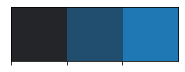

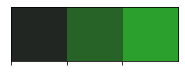

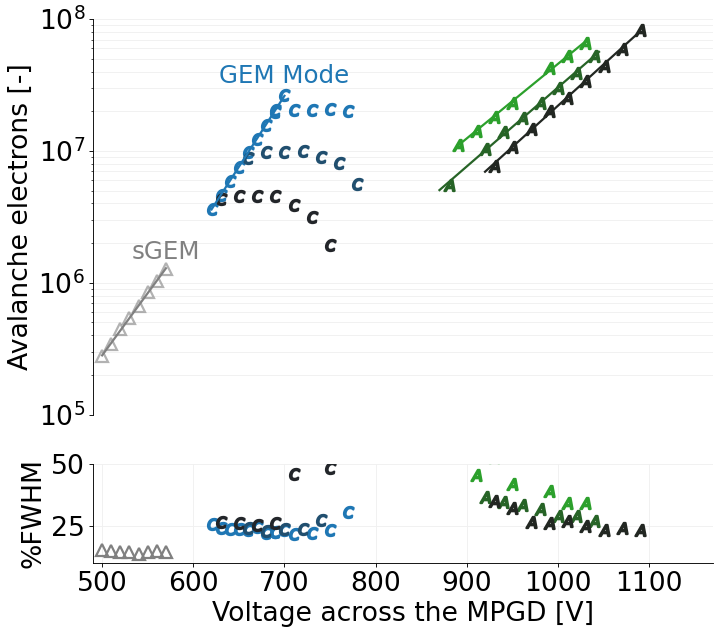

In [ ]:
#@title Charge signals

color_CAT = get_color(3, 'tab:blue')
color_AND = get_color(3, 'tab:green')

fig, (ax) = plt.subplots(2,1,figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k', gridspec_kw={'height_ratios': [4, 1]}) 

#GEM Mode
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM'], he40cf4_cobra['CAT electrons'].loc[he40cf4_cobra['Type']=='GEM'], color='none', marker='$C$', markersize=10, 
               markeredgecolor=color_CAT[2], markeredgewidth=2, ecolor=color_CAT[2], elinewidth=1.5, capsize=5, capthick=1.5)
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM']
y = np.log(he40cf4_cobra['CAT electrons'].loc[he40cf4_cobra['Type']=='GEM'])
popt, pcov = curve_fit(linear, x, y, p0=[0.001,10])
ycalc = np.exp(linear(np.arange(620, 705, 5), *popt))
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(620, 705, 5), ycalc, color=color_CAT[2], lw=2, zorder=5)
ax[0].text(700, 3e7, 'GEM Mode', fontsize=22, ha='center', va='bottom', color=color_CAT[2])

#HIGH Holes
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'], he40cf4_cobra['CAT electrons'].loc[he40cf4_cobra['Type']=='HIGH'], color='none', marker='$C$', markersize=10, 
               markeredgecolor=color_CAT[2], markeredgewidth=2, ecolor=color_CAT[2], elinewidth=1.5, capsize=5, capthick=1.5)
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'], he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='HIGH'], color='none', marker='$A$', markersize=10, 
               markeredgecolor=color_AND[2], markeredgewidth=2, ecolor=color_AND[2], elinewidth=1.5, capsize=5, capthick=1.5)
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'].loc[he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='HIGH']>0]
y = np.log(he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='HIGH'].loc[he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='HIGH']>0])
popt, pcov = curve_fit(linear, x, y, p0=[0.001,10])
ycalc = np.exp(linear(np.arange(890, 1035, 5), *popt))
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(890, 1035, 5), ycalc, color=color_AND[2], lw=2, zorder=5)
#ax[0].text(700, 3e7, 'GEM Mode', fontsize=22, ha='center', va='bottom', color=color_CAT[2])

#Medium Holes
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'], he40cf4_cobra['CAT electrons'].loc[he40cf4_cobra['Type']=='MEDIUM'], color='none', marker='$C$', markersize=10, 
               markeredgecolor=color_CAT[1], markeredgewidth=2, ecolor=color_CAT[1], elinewidth=1.5, capsize=5, capthick=1.5)
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'], he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='MEDIUM'], color='none', marker='$A$', markersize=10, 
               markeredgecolor=color_AND[1], markeredgewidth=2, ecolor=color_AND[1], elinewidth=1.5, capsize=5, capthick=1.5)
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'].loc[he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='MEDIUM']>0]
y = np.log(he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='MEDIUM'].loc[he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='MEDIUM']>0])
popt, pcov = curve_fit(linear, x, y, p0=[0.001,10])
ycalc = np.exp(linear(np.arange(870, 1050, 5), *popt))
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(870, 1050, 5), ycalc, color=color_AND[1], lw=2, zorder=5)

#Low Holes
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'], he40cf4_cobra['CAT electrons'].loc[he40cf4_cobra['Type']=='LOW'], color='none', marker='$C$', markersize=10, 
               markeredgecolor=color_CAT[0], markeredgewidth=2, ecolor=color_CAT[0], elinewidth=1.5, capsize=5, capthick=1.5)
ax[0].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'], he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='LOW'], color='none', marker='$A$', markersize=10, 
               markeredgecolor=color_AND[0], markeredgewidth=2, ecolor=color_AND[0], elinewidth=1.5, capsize=5, capthick=1.5)
x = he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'].loc[he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='LOW']>0]
y = np.log(he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='LOW'].loc[he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='LOW']>0])
popt, pcov = curve_fit(linear, x, y, p0=[0.001,10])
ycalc = np.exp(linear(np.arange(920, 1095, 5), *popt))
pcov = np.sqrt(np.diag(pcov))
print('Slope =', ufloat(popt[0], pcov[0]))
print('Intercept = ', ufloat(popt[1], pcov[1]))
chi, p = chisquare(f_obs=y, f_exp=linear(x, *popt), ddof=len(x)-2, axis=0)
print('Chi2 =', chi, 'P-value =', p)
print('Maximum chi value:', chi2.ppf(1-0.05, df=len(x)-2))
ax[0].plot(np.arange(920, 1095, 5), ycalc, color=color_AND[0], lw=2, zorder=5)

#50um GEM
ax[0].errorbar(he40cf4_gem['GEM [V]'], he40cf4_gem['Avalanche electrons'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.6)
ax[0].plot(he40cf4_gem['GEM [V]'].loc[he40cf4_gem['Avalanche electrons']>0], he40cf4_gem['fit_charge'].loc[he40cf4_gem['Avalanche electrons']>0], color='gray', lw=2, zorder=5)
ax[0].text(570, 1.4e6, 'sGEM', fontsize=22, ha='center', va='bottom', color='gray')


ax[0].grid(color=(0.94, 0.94, 0.94), which="both")
ax[0].set_ylim(1e5, 1e8)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].set_ylabel('Avalanche electrons [-]', y=0.5, ha='center', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=24)
ax[0].tick_params(axis='both', which='minor', labelsize=24)
ax[0].set_xlim(490,1170)
ax[0].semilogy()
ax[0].xaxis.set_visible(False)
ax[0].semilogy()

ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM'], he40cf4_cobra['CAT_ERES'].loc[he40cf4_cobra['Type']=='GEM'], color='none', marker='$C$', markersize=10, 
               markeredgecolor=color_CAT[2], markeredgewidth=2, ecolor=color_CAT[2], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'], he40cf4_cobra['CAT_ERES'].loc[he40cf4_cobra['Type']=='HIGH'], color='none', marker='$C$', markersize=10, 
               markeredgecolor=color_CAT[2], markeredgewidth=2, ecolor=color_CAT[2], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'], he40cf4_cobra['AND_ERES'].loc[he40cf4_cobra['Type']=='HIGH'], color='none', marker='$A$', markersize=10, 
               markeredgecolor=color_AND[2], markeredgewidth=2, ecolor=color_AND[2], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'], he40cf4_cobra['CAT_ERES'].loc[he40cf4_cobra['Type']=='MEDIUM'], color='none', marker='$C$', markersize=10, 
               markeredgecolor=color_CAT[1], markeredgewidth=2, ecolor=color_CAT[1], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='MEDIUM'], he40cf4_cobra['AND_ERES'].loc[he40cf4_cobra['Type']=='MEDIUM'], color='none', marker='$A$', markersize=10, 
               markeredgecolor=color_AND[1], markeredgewidth=2, ecolor=color_AND[1], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'], he40cf4_cobra['CAT_ERES'].loc[he40cf4_cobra['Type']=='LOW'], color='none', marker='$C$', markersize=10, 
               markeredgecolor=color_CAT[0], markeredgewidth=2, ecolor=color_CAT[0], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='LOW'], he40cf4_cobra['AND_ERES'].loc[he40cf4_cobra['Type']=='LOW'], color='none', marker='$A$', markersize=10, 
               markeredgecolor=color_AND[0], markeredgewidth=2, ecolor=color_AND[0], elinewidth=1.5, capsize=5, capthick=1.5)
ax[1].errorbar(he40cf4_gem['GEM [V]'], he40cf4_gem['Bottom eres'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].set_xlabel('Voltage across the MPGD [V]', y=0.5, ha='center', fontsize=24)
ax[1].grid(color=(0.94, 0.94, 0.94), which="both")
ax[1].set_ylim(10, 50)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].set_ylabel('%FWHM', y=0.5, ha='center', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=24)
ax[1].tick_params(axis='both', which='minor', labelsize=24)
ax[1].set_xlim(490,1170)
plt.show()

In [ ]:
#@title Increase in Charge
print('GEM Mode:', he40cf4_cobra['CAT electrons'].loc[he40cf4_cobra['Type']=='GEM'].max()/he40cf4_gem['Avalanche electrons'].max())
print('High Holes:', he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='HIGH'].max()/he40cf4_gem['Avalanche electrons'].max())
print('Medium Holes:', he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='MEDIUM'].max()/he40cf4_gem['Avalanche electrons'].max())
print('Low Holes:', he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']=='LOW'].max()/he40cf4_gem['Avalanche electrons'].max())

GEM Mode: 20.974528489472654
High Holes: 51.74780972865127
Medium Holes: 41.25658077529886
Low Holes: 65.39506479625298


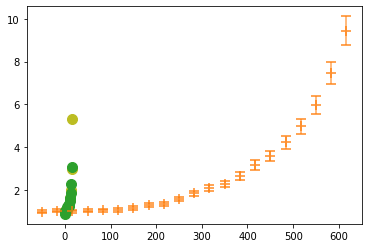

In [ ]:
CYGNO = pd.read_csv("/content/drive/MyDrive/APPLE/UVis/He-40%CF4/CYGNO_ind.csv")


plt.errorbar((he40cf4_cobra['Strips [V] '].loc[he40cf4_cobra['Type']=='MEDIUM']/100)/0.006, he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM']/he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2], 
            yerr=he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']=='MEDIUM']/he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].iloc[2], color='none', marker='+', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
plt.plot(CYGNO['Induction field [kV/cm]'], CYGNO['LEMOn']/CYGNO['LEMOn'].iloc[1], color='tab:olive', marker='o', lw=0, markersize=10)
plt.plot(CYGNO['Induction field [kV/cm]'], CYGNO['MANGO']/CYGNO['MANGO'].iloc[2], color='tab:green', marker='o', lw=0, markersize=10)
#plt.semilogy()
plt.show()

# 3% CH$_4$

In [ ]:
he40cf43ch4_cobra = pd.read_csv('/content/drive/MyDrive/COBRA/Measurements/He40CF4+3CH4/He40CF43CH4.csv')
he40cf43ch4_gem = pd.read_csv('/content/drive/MyDrive/APPLE/UVis/He-40%CF4+3%CH4/UVis fits - He-40%CF4+3%CH4.csv')
he40cf43ch4_cobra.describe()

,LAAPD [V],I-mesh [V],Anode [V],Cathode [V],Top [V],D-Mesh [V],Holes [V],Strips [V],COBRA [V],AND_CH,...,EL_dERES,EL_AMP,I [nA],EL_Ratio,CAT electrons,dCAT electrons,AND electrons,AND delectrons,EL yield,dEL yield
count,65.0,65.0,65.0,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,14.000000,...,62.000000,62.000000,62.000000,62.000000,2.800000e+01,2.800000e+01,1.400000e+01,1.400000e+01,62.000000,62.000000
mean,1750.0,-140.0,-50.0,-184.307692,-890.769231,-1140.769231,706.461538,134.307692,840.769231,517.421429,...,0.675645,80.000000,250.927419,12.772739,1.479477e+07,7.408416e+05,2.432450e+07,1.218257e+06,34725.971709,2465.820283
std,0.0,0.0,0.0,129.831251,124.803692,124.803692,24.007210,129.831251,124.803692,114.824456,...,0.295172,39.422054,1.422440,10.665021,8.661175e+06,4.327647e+05,1.314921e+07,6.572665e+05,28995.597647,2058.565790
min,1750.0,-140.0,-50.0,-460.000000,-1140.000000,-1390.000000,680.000000,-30.000000,650.000000,285.300000,...,0.310000,10.000000,248.500000,2.242025,3.512006e+06,1.758986e+05,1.200290e+07,6.008891e+05,6095.521641,432.228370
25%,1750.0,-140.0,-50.0,-280.000000,-990.000000,-1240.000000,680.000000,10.000000,730.000000,444.075000,...,0.500000,50.000000,249.625000,5.360500,6.260860e+06,3.134731e+05,1.467478e+07,7.344075e+05,14573.895985,1035.295206
50%,1750.0,-140.0,-50.0,-180.000000,-880.000000,-1130.000000,710.000000,130.000000,830.000000,507.350000,...,0.600000,100.000000,251.500000,10.680000,1.181591e+07,5.909861e+05,2.054544e+07,1.030897e+06,29036.322939,2064.258047
75%,1750.0,-140.0,-50.0,-60.000000,-780.000000,-1030.000000,730.000000,230.000000,940.000000,579.325000,...,0.800000,100.000000,252.000000,15.941000,2.429223e+07,1.215144e+06,2.824219e+07,1.413256e+06,43339.702619,3078.302608
max,1750.0,-140.0,-50.0,-20.000000,-700.000000,-950.000000,750.000000,410.000000,1090.000000,698.000000,...,1.600000,200.000000,252.500000,47.660000,3.115413e+07,1.558917e+06,5.790689e+07,2.897059e+06,129575.950495,9197.900771


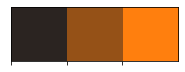

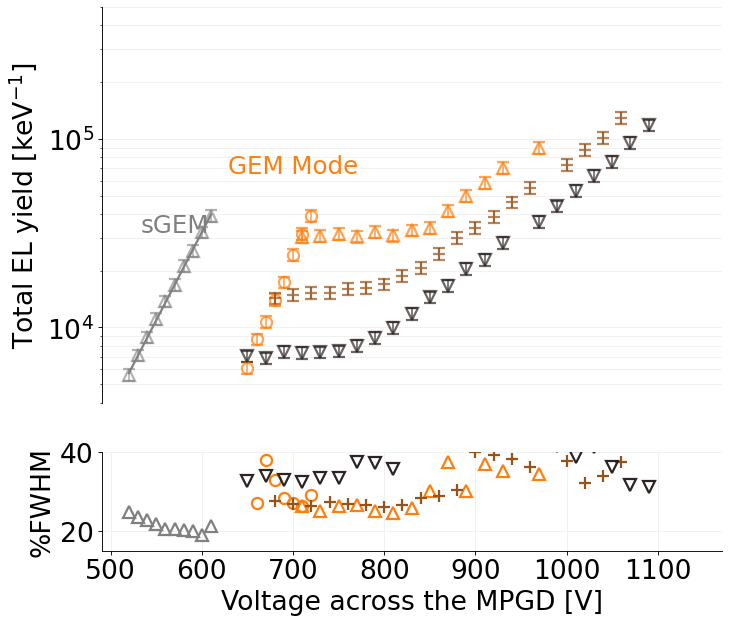

In [ ]:
#@title Light Yield

color = get_color(3, 'tab:orange')

fig, (ax) = plt.subplots(2,1,figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k', gridspec_kw={'height_ratios': [4, 1]}) 

#GEM Mode
ax[0].errorbar(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='GEM'], he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='GEM'], yerr=he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
ax[0].text(700, 6.2e4, 'GEM Mode', fontsize=22, ha='center', va='bottom', color='tab:orange')

#High Holes
ax[0].errorbar(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='HIGH'], he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'], 
            yerr=he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'], color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1030, 3.2e5, '720 V', fontsize=20, ha='right', va='bottom', color='tab:orange')

#Medium Holes
ax[0].errorbar(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'], he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'], 
            yerr=he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'], color='none', marker='+', markersize=10, 
               markeredgecolor=color[1], markeredgewidth=2, ecolor=color[1], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1075, 2.7e5, '690 V', fontsize=20, ha='center', va='bottom', color=color[1])

#Low Holes
ax[0].errorbar(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='LOW'], he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'], 
            yerr=he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'], color='none', marker='v', markersize=10, 
               markeredgecolor=color[0], markeredgewidth=2, ecolor=color[0], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1095, 2.15e5, '660 V', fontsize=20, ha='left', va='bottom', color=color[0])

#50um GEM
ax[0].errorbar(he40cf43ch4_gem['GEM [V]'], he40cf43ch4_gem['EL yield'], yerr=he40cf43ch4_gem['dEL yield'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.6)
ax[0].plot(he40cf43ch4_gem['GEM [V]'].loc[he40cf43ch4_gem['EL yield']>0], he40cf43ch4_gem['fit_el'].loc[he40cf43ch4_gem['EL yield']>0], color='gray', lw=2, zorder=5)
ax[0].text(570, 3e4, 'sGEM', fontsize=22, ha='center', va='bottom', color='gray')


ax[0].grid(color=(0.94, 0.94, 0.94), which="both")
ax[0].set_ylim(4e3, 5e5)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].set_ylabel('Total EL yield [keV$^{-1}$]', y=0.5, ha='center', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=24)
ax[0].tick_params(axis='both', which='minor', labelsize=24)
ax[0].set_xlim(490,1170)
ax[0].semilogy()
ax[0].xaxis.set_visible(False)

ax[1].errorbar(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='GEM'], he40cf43ch4_cobra['EL_ERES'].loc[he40cf43ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='HIGH'], he40cf43ch4_cobra['EL_ERES'].loc[he40cf43ch4_cobra['Type']=='HIGH'], 
            color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'], he40cf43ch4_cobra['EL_ERES'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'], 
            color='none', marker='+', markersize=10, 
               markeredgecolor=color[1], markeredgewidth=2, ecolor=color[1], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='LOW'], he40cf43ch4_cobra['EL_ERES'].loc[he40cf43ch4_cobra['Type']=='LOW'], 
            color='none', marker='v', markersize=10, 
               markeredgecolor=color[0], markeredgewidth=2, ecolor=color[0], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf43ch4_gem['GEM [V]'], he40cf43ch4_gem['EL eres'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5)


ax[1].set_xlabel('Voltage across the MPGD [V]', y=0.5, ha='center', fontsize=24)
ax[1].grid(color=(0.94, 0.94, 0.94), which="both")
ax[1].set_ylim(15, 40)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].set_ylabel('%FWHM', y=0.5, ha='center', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=24)
ax[1].tick_params(axis='both', which='minor', labelsize=24)
ax[1].set_xlim(490,1170)

plt.show()

In [ ]:
#@title Increase in Light Yield
print('GEM Mode:', he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='GEM'].max()/he40cf43ch4_gem['EL yield'].max())
print('High Holes:', he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'].max()/he40cf43ch4_gem['EL yield'].max())
print('Medium Holes:', he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'].max()/he40cf43ch4_gem['EL yield'].max())
print('Low Holes:', he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'].max()/he40cf43ch4_gem['EL yield'].max())

GEM Mode: 1.0014896901889867
High Holes: 2.2922645615150725
Medium Holes: 3.3206482979273066
Low Holes: 3.0283671479104144


# 5% CH$_4$

In [ ]:
he40cf45ch4_cobra = pd.read_csv('/content/drive/MyDrive/COBRA/Measurements/He40CF4+5CH4/He40CF45CH4.csv')
he40cf45ch4_gem = pd.read_csv('/content/drive/MyDrive/APPLE/UVis/He-40%CF4+5%CH4/UVis fits - He-40%CF4+5%CH4.csv')
he40cf45ch4_cobra.describe()

,LAAPD [V],I-mesh [V],Anode [V],Cathode [V],Top [V],D-Mesh [V],Holes [V],Strips [V],COBRA [V],AND_CH,...,EL_dERES,EL_AMP,I [nA],EL_Ratio,CAT electrons,dCAT electrons,AND electrons,AND delectrons,EL yield,dEL yield
count,60.0,60.0,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,20.000000,...,60.000000,60.000000,60.000000,60.000000,1.800000e+01,1.800000e+01,2.000000e+01,2.000000e+01,60.000000,60.000000
mean,1750.0,-140.0,-50.0,-216.666667,-928.333333,-1178.333333,711.666667,166.666667,878.333333,597.625000,...,1.062333,74.833333,260.175000,14.014005,1.444189e+07,7.226077e+05,2.984781e+07,1.493731e+06,37989.122086,2701.805086
std,0.0,0.0,0.0,139.255486,129.158511,129.158511,23.661932,139.255486,129.158511,158.431818,...,0.904155,33.521643,0.723837,11.030522,6.711925e+06,3.358517e+05,1.924469e+07,9.624567e+05,30046.696614,2133.478029
min,1750.0,-140.0,-50.0,-500.000000,-1180.000000,-1430.000000,680.000000,-30.000000,660.000000,349.400000,...,0.290000,20.000000,259.500000,2.486222,5.054013e+06,2.529992e+05,8.704469e+06,4.353375e+05,6759.432166,478.800185
25%,1750.0,-140.0,-50.0,-320.000000,-1032.500000,-1282.500000,680.000000,45.000000,767.500000,481.200000,...,0.500000,50.000000,259.500000,5.624841,9.419618e+06,4.711505e+05,1.592290e+07,7.984923e+05,15292.575611,1085.263593
50%,1750.0,-140.0,-50.0,-220.000000,-935.000000,-1185.000000,710.000000,170.000000,885.000000,598.900000,...,0.700000,100.000000,260.000000,9.757615,1.434086e+07,7.173202e+05,2.456882e+07,1.229683e+06,26145.552362,1861.767277
75%,1750.0,-140.0,-50.0,-95.000000,-817.500000,-1067.500000,740.000000,270.000000,982.500000,687.700000,...,1.200000,100.000000,260.500000,18.699079,2.044916e+07,1.023000e+06,3.841899e+07,1.922548e+06,50838.249829,3646.007153
max,1750.0,-140.0,-50.0,-20.000000,-710.000000,-960.000000,750.000000,450.000000,1130.000000,856.200000,...,4.000000,100.000000,262.500000,50.702741,2.762847e+07,1.382641e+06,8.482248e+07,4.242810e+06,137848.422523,9764.878538


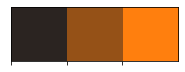

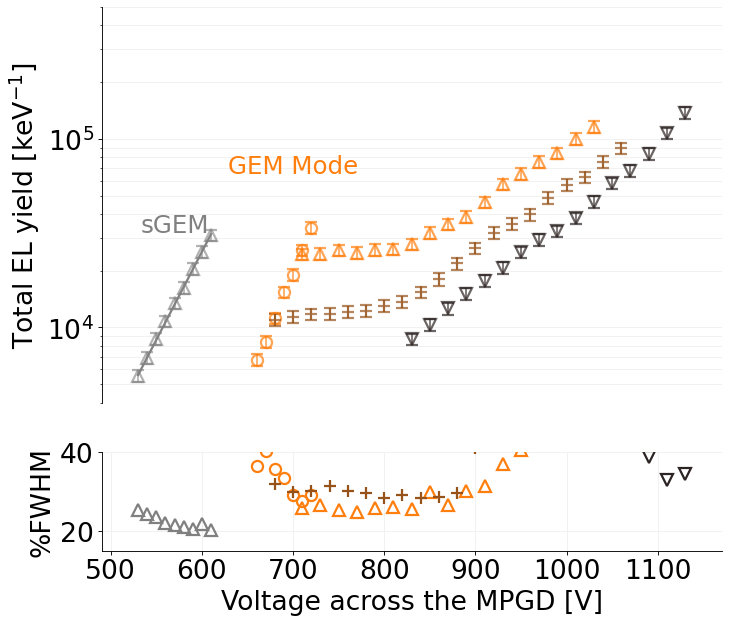

In [ ]:
#@title Light Yield

color = get_color(3, 'tab:orange')

fig, (ax) = plt.subplots(2,1,figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k', gridspec_kw={'height_ratios': [4, 1]}) 

#GEM Mode
ax[0].errorbar(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='GEM'], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='GEM'], yerr=he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
ax[0].text(700, 6.2e4, 'GEM Mode', fontsize=22, ha='center', va='bottom', color='tab:orange')

#High Holes
ax[0].errorbar(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='HIGH'], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'], 
            yerr=he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'], color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1030, 3.2e5, '720 V', fontsize=20, ha='right', va='bottom', color='tab:orange')

#Medium Holes
ax[0].errorbar(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'], 
            yerr=he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'], color='none', marker='+', markersize=10, 
               markeredgecolor=color[1], markeredgewidth=2, ecolor=color[1], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1075, 2.7e5, '690 V', fontsize=20, ha='center', va='bottom', color=color[1])

#Low Holes
ax[0].errorbar(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='LOW'], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'], 
            yerr=he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'], color='none', marker='v', markersize=10, 
               markeredgecolor=color[0], markeredgewidth=2, ecolor=color[0], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1095, 2.15e5, '660 V', fontsize=20, ha='left', va='bottom', color=color[0])

#50um GEM
ax[0].errorbar(he40cf45ch4_gem['GEM [V]'], he40cf45ch4_gem['EL yield'], yerr=he40cf45ch4_gem['dEL yield'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.6)
ax[0].plot(he40cf45ch4_gem['GEM [V]'].loc[he40cf45ch4_gem['EL yield']>0], he40cf45ch4_gem['fit_el'].loc[he40cf45ch4_gem['EL yield']>0], color='gray', lw=2, zorder=5)
ax[0].text(570, 3e4, 'sGEM', fontsize=22, ha='center', va='bottom', color='gray')


ax[0].grid(color=(0.94, 0.94, 0.94), which="both")
ax[0].set_ylim(4e3, 5e5)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].set_ylabel('Total EL yield [keV$^{-1}$]', y=0.5, ha='center', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=24)
ax[0].tick_params(axis='both', which='minor', labelsize=24)
ax[0].set_xlim(490,1170)
ax[0].semilogy()
ax[0].xaxis.set_visible(False)

ax[1].errorbar(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='GEM'], he40cf45ch4_cobra['EL_ERES'].loc[he40cf45ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='HIGH'], he40cf45ch4_cobra['EL_ERES'].loc[he40cf45ch4_cobra['Type']=='HIGH'], 
            color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'], he40cf45ch4_cobra['EL_ERES'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'], 
            color='none', marker='+', markersize=10, 
               markeredgecolor=color[1], markeredgewidth=2, ecolor=color[1], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='LOW'], he40cf45ch4_cobra['EL_ERES'].loc[he40cf45ch4_cobra['Type']=='LOW'], 
            color='none', marker='v', markersize=10, 
               markeredgecolor=color[0], markeredgewidth=2, ecolor=color[0], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf45ch4_gem['GEM [V]'], he40cf45ch4_gem['EL eres'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5)


ax[1].set_xlabel('Voltage across the MPGD [V]', y=0.5, ha='center', fontsize=24)
ax[1].grid(color=(0.94, 0.94, 0.94), which="both")
ax[1].set_ylim(15, 40)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].set_ylabel('%FWHM', y=0.5, ha='center', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=24)
ax[1].tick_params(axis='both', which='minor', labelsize=24)
ax[1].set_xlim(490,1170)

plt.show()

In [ ]:
#@title Increase in Light Yield
print('GEM Mode:', he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='GEM'].max()/he40cf45ch4_gem['EL yield'].max())
print('High Holes:', he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'].max()/he40cf45ch4_gem['EL yield'].max())
print('Medium Holes:', he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'].max()/he40cf45ch4_gem['EL yield'].max())
print('Low Holes:', he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'].max()/he40cf45ch4_gem['EL yield'].max())

GEM Mode: 1.0905126022494718
High Holes: 3.762694909641727
Medium Holes: 2.8855070734100865
Low Holes: 4.461744466916286


# 7% CH$_4$

In [ ]:
he40cf47ch4_cobra = pd.read_csv('/content/drive/MyDrive/COBRA/Measurements/He40CF4+7CH4/He40CF47CH4.csv')
he40cf47ch4_gem = pd.read_csv('/content/drive/MyDrive/APPLE/UVis/He-40%CF4+7%CH4/UVis fits - He-40%CF4+7%CH4.csv')
he40cf47ch4_cobra.describe()

,LAAPD [V],I-mesh [V],Anode [V],Cathode [V],Top [V],D-Mesh [V],Holes [V],Strips [V],COBRA [V],AND_CH,...,EL_dERES,EL_AMP,I [nA],EL_Ratio,CAT electrons,dCAT electrons,AND electrons,AND delectrons,EL yield,dEL yield
count,48.0,48.0,48.0,48.000000,48.00000,48.00000,48.0000,48.000000,48.00000,14.000000,...,48.000000,48.000000,48.000000,48.000000,1.600000e+01,1.600000e+01,1.400000e+01,1.400000e+01,48.000000,48.000000
mean,1750.0,-140.0,-50.0,-198.750000,-923.12500,-1173.12500,724.3750,148.750000,873.12500,520.392857,...,1.186875,75.000000,228.302083,13.073270,1.256438e+07,6.285861e+05,3.317720e+07,1.659849e+06,35582.580195,2522.829311
std,0.0,0.0,0.0,139.140599,135.16194,135.16194,15.8324,139.140599,135.16194,153.335773,...,0.899388,33.895961,12.307989,11.933969,6.040780e+06,3.022422e+05,2.245329e+07,1.123026e+06,32424.645328,2297.936919
min,1750.0,-140.0,-50.0,-480.000000,-1190.00000,-1440.00000,710.0000,-30.000000,680.00000,349.800000,...,0.330000,20.000000,212.500000,2.673514,4.673119e+06,2.340544e+05,1.008961e+07,5.047019e+05,7268.634038,514.288276
25%,1750.0,-140.0,-50.0,-305.000000,-1032.50000,-1282.50000,710.0000,25.000000,747.50000,393.075000,...,0.475000,50.000000,216.375000,4.783709,7.096028e+06,3.548959e+05,1.783743e+07,8.922201e+05,12981.506649,919.688639
50%,1750.0,-140.0,-50.0,-190.000000,-915.00000,-1165.00000,710.0000,140.000000,865.00000,495.650000,...,0.800000,100.000000,227.500000,8.049862,1.305449e+07,6.537880e+05,2.688570e+07,1.345566e+06,22239.797690,1574.102522
75%,1750.0,-140.0,-50.0,-75.000000,-797.50000,-1047.50000,740.0000,255.000000,982.50000,609.050000,...,1.725000,100.000000,241.500000,18.130570,1.586632e+07,7.935195e+05,3.805402e+07,1.904041e+06,49292.612083,3499.309962
max,1750.0,-140.0,-50.0,-20.000000,-730.00000,-980.00000,760.0000,430.000000,1140.00000,900.900000,...,3.300000,100.000000,242.500000,52.688172,2.643049e+07,1.322652e+06,8.977511e+07,4.490923e+06,143246.327577,10148.547162


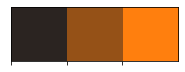

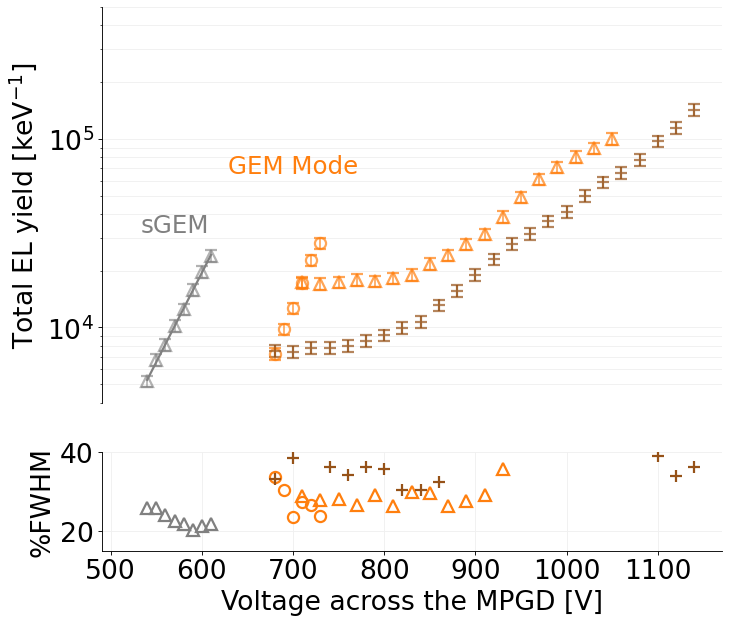

In [ ]:
#@title Light Yield

color = get_color(3, 'tab:orange')

fig, (ax) = plt.subplots(2,1,figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k', gridspec_kw={'height_ratios': [4, 1]}) 

#GEM Mode
ax[0].errorbar(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='GEM'], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='GEM'], yerr=he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
ax[0].text(700, 6.2e4, 'GEM Mode', fontsize=22, ha='center', va='bottom', color='tab:orange')

#High Holes
ax[0].errorbar(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='HIGH'], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'], 
            yerr=he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'], color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1030, 3.2e5, '720 V', fontsize=20, ha='right', va='bottom', color='tab:orange')

#Medium Holes
ax[0].errorbar(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'], 
            yerr=he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'], color='none', marker='+', markersize=10, 
               markeredgecolor=color[1], markeredgewidth=2, ecolor=color[1], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1075, 2.7e5, '690 V', fontsize=20, ha='center', va='bottom', color=color[1])


#50um GEM
ax[0].errorbar(he40cf47ch4_gem['GEM [V]'], he40cf47ch4_gem['EL yield'], yerr=he40cf47ch4_gem['dEL yield'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.6)
ax[0].plot(he40cf47ch4_gem['GEM [V]'].loc[he40cf47ch4_gem['EL yield']>0], he40cf47ch4_gem['fit_el'].loc[he40cf47ch4_gem['EL yield']>0], color='gray', lw=2, zorder=5)
ax[0].text(570, 3e4, 'sGEM', fontsize=22, ha='center', va='bottom', color='gray')


ax[0].grid(color=(0.94, 0.94, 0.94), which="both")
ax[0].set_ylim(4e3, 5e5)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].set_ylabel('Total EL yield [keV$^{-1}$]', y=0.5, ha='center', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=24)
ax[0].tick_params(axis='both', which='minor', labelsize=24)
ax[0].set_xlim(490,1170)
ax[0].semilogy()
ax[0].xaxis.set_visible(False)

ax[1].errorbar(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='GEM'], he40cf47ch4_cobra['EL_ERES'].loc[he40cf47ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='HIGH'], he40cf47ch4_cobra['EL_ERES'].loc[he40cf47ch4_cobra['Type']=='HIGH'], 
            color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'], he40cf47ch4_cobra['EL_ERES'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'], 
            color='none', marker='+', markersize=10, 
               markeredgecolor=color[1], markeredgewidth=2, ecolor=color[1], elinewidth=1.5, capsize=5, capthick=1.5)


ax[1].errorbar(he40cf47ch4_gem['GEM [V]'], he40cf47ch4_gem['EL eres'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5)


ax[1].set_xlabel('Voltage across the MPGD [V]', y=0.5, ha='center', fontsize=24)
ax[1].grid(color=(0.94, 0.94, 0.94), which="both")
ax[1].set_ylim(15, 40)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].set_ylabel('%FWHM', y=0.5, ha='center', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=24)
ax[1].tick_params(axis='both', which='minor', labelsize=24)
ax[1].set_xlim(490,1170)

plt.show()

In [ ]:
#@title Increase in Light Yield
print('GEM Mode:', he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='GEM'].max()/he40cf47ch4_gem['EL yield'].max())
print('High Holes:', he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'].max()/he40cf47ch4_gem['EL yield'].max())
print('Medium Holes:', he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'].max()/he40cf47ch4_gem['EL yield'].max())

GEM Mode: 1.16350110575004
High Holes: 4.157846328382613
Medium Holes: 5.951167221394824


# 3% isobutano

In [ ]:
he40cf43iso_cobra = pd.read_csv('/content/drive/MyDrive/COBRA/Measurements/He40CF4+3iso/He40CF43iso.csv')
he40cf43iso_gem = pd.read_csv('/content/drive/MyDrive/APPLE/UVis/He-40%CF4-3%isobutane /UVis fits - He-40%CF4-3%isobutane - GEM.csv')
he40cf43iso_cobra.describe()

,LAAPD [V],I-mesh [V],Anode [V],Cathode [V],Top [V],D-Mesh [V],Holes [V],Strips [V],COBRA [V],AND_CH,...,EL_dERES,EL_AMP,I [nA],EL_Ratio,CAT electrons,dCAT electrons,AND electrons,AND delectrons,EL yield,dEL yield
count,19.0,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,6.000000,...,19.000000,19.000000,19.000000,19.000000,1.000000e+01,1.000000e+01,6.000000e+00,6.000000e+00,19.000000,19.000000
mean,1750.0,-140.0,-50.0,-146.315789,-846.315789,-1096.315789,700.000000,96.315789,796.315789,639.800000,...,2.160526,76.315789,208.221053,7.259021,2.905033e+07,1.454154e+06,3.699109e+07,1.854699e+06,19735.513252,1409.913822
std,0.0,0.0,0.0,103.505798,103.559458,103.559458,3.333333,103.505798,103.559458,240.603516,...,3.051802,36.394524,2.289002,6.413149,4.885454e+06,2.446433e+05,1.690653e+07,8.475556e+05,17435.791375,1254.747770
min,1750.0,-140.0,-50.0,-320.000000,-1020.000000,-1270.000000,690.000000,-30.000000,660.000000,347.600000,...,0.350000,20.000000,203.500000,2.116459,2.210960e+07,1.106370e+06,1.731925e+07,8.680242e+05,5754.138305,407.209183
25%,1750.0,-140.0,-50.0,-230.000000,-930.000000,-1180.000000,700.000000,0.000000,700.000000,494.500000,...,0.500000,35.000000,206.750000,3.042161,2.760628e+07,1.381850e+06,2.463858e+07,1.235860e+06,8270.894729,585.255152
50%,1750.0,-140.0,-50.0,-140.000000,-840.000000,-1090.000000,700.000000,90.000000,790.000000,602.350000,...,0.800000,100.000000,208.700000,4.069236,2.874453e+07,1.438693e+06,3.479047e+07,1.744159e+06,11063.264227,782.888217
75%,1750.0,-140.0,-50.0,-50.000000,-750.000000,-1000.000000,700.000000,180.000000,880.000000,759.550000,...,2.450000,100.000000,210.000000,9.682248,2.921553e+07,1.462548e+06,4.802530e+07,2.408436e+06,26323.678257,1869.920042
max,1750.0,-140.0,-50.0,-20.000000,-710.000000,-960.000000,710.000000,270.000000,970.000000,1016.000000,...,13.000000,100.000000,211.000000,23.096703,4.137956e+07,2.071510e+06,6.135480e+07,3.075563e+06,62794.319278,4472.029205


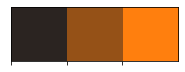

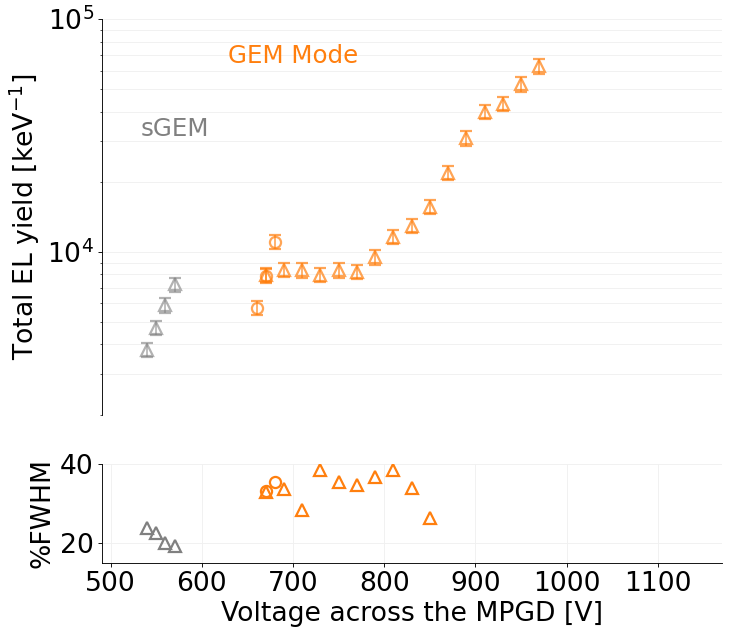

In [ ]:
#@title Light Yield

color = get_color(3, 'tab:orange')

fig, (ax) = plt.subplots(2,1,figsize=(10, 9), dpi= 80, facecolor='w', edgecolor='k', gridspec_kw={'height_ratios': [4, 1]}) 

#GEM Mode
ax[0].errorbar(he40cf43iso_cobra['COBRA [V]'].loc[he40cf43iso_cobra['Type']=='GEM'], he40cf43iso_cobra['EL yield'].loc[he40cf43iso_cobra['Type']=='GEM'], yerr=he40cf43iso_cobra['dEL yield'].loc[he40cf43iso_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
ax[0].text(700, 6.2e4, 'GEM Mode', fontsize=22, ha='center', va='bottom', color='tab:orange')

#High Holes
ax[0].errorbar(he40cf43iso_cobra['COBRA [V]'].loc[he40cf43iso_cobra['Type']=='HIGH'], he40cf43iso_cobra['EL yield'].loc[he40cf43iso_cobra['Type']=='HIGH'], 
            yerr=he40cf43iso_cobra['dEL yield'].loc[he40cf43iso_cobra['Type']=='HIGH'], color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.7)
#ax[0].text(1030, 3.2e5, '720 V', fontsize=20, ha='right', va='bottom', color='tab:orange')

#50um GEM
ax[0].errorbar(he40cf43iso_gem['GEM [V]'], he40cf43iso_gem['EL yield'], yerr=he40cf43iso_gem['dEL yield'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5, alpha=0.6)
ax[0].text(570, 3e4, 'sGEM', fontsize=22, ha='center', va='bottom', color='gray')


ax[0].grid(color=(0.94, 0.94, 0.94), which="both")
ax[0].set_ylim(2e3, 1e5)
ax[0].spines["right"].set_visible(False)
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].set_ylabel('Total EL yield [keV$^{-1}$]', y=0.5, ha='center', fontsize=24)
ax[0].tick_params(axis='both', which='major', labelsize=24)
ax[0].tick_params(axis='both', which='minor', labelsize=24)
ax[0].set_xlim(490,1170)
ax[0].semilogy()
ax[0].xaxis.set_visible(False)

ax[1].errorbar(he40cf43iso_cobra['COBRA [V]'].loc[he40cf43iso_cobra['Type']=='GEM'], he40cf43iso_cobra['EL_ERES'].loc[he40cf43iso_cobra['Type']=='GEM'], color='none', marker='o', markersize=10, 
               markeredgecolor='tab:orange', markeredgewidth=2, ecolor='tab:orange', elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf43iso_cobra['COBRA [V]'].loc[he40cf43iso_cobra['Type']=='HIGH'], he40cf43iso_cobra['EL_ERES'].loc[he40cf43iso_cobra['Type']=='HIGH'], 
            color='none', marker='^', markersize=10, 
               markeredgecolor=color[2], markeredgewidth=2, ecolor=color[2], elinewidth=1.5, capsize=5, capthick=1.5)

ax[1].errorbar(he40cf43iso_gem['GEM [V]'], he40cf43iso_gem['EL eres'], color='none', marker='^', markersize=10, 
               markeredgecolor='gray', markeredgewidth=2, ecolor='gray', elinewidth=1.5, capsize=5, capthick=1.5)


ax[1].set_xlabel('Voltage across the MPGD [V]', y=0.5, ha='center', fontsize=24)
ax[1].grid(color=(0.94, 0.94, 0.94), which="both")
ax[1].set_ylim(15, 40)
ax[1].spines["right"].set_visible(False)
ax[1].spines["top"].set_visible(False)
ax[1].set_ylabel('%FWHM', y=0.5, ha='center', fontsize=24)
ax[1].tick_params(axis='both', which='major', labelsize=24)
ax[1].tick_params(axis='both', which='minor', labelsize=24)
ax[1].set_xlim(490,1170)

plt.show()

# Methane Admixtures

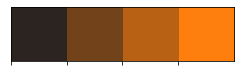

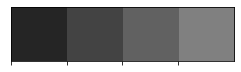

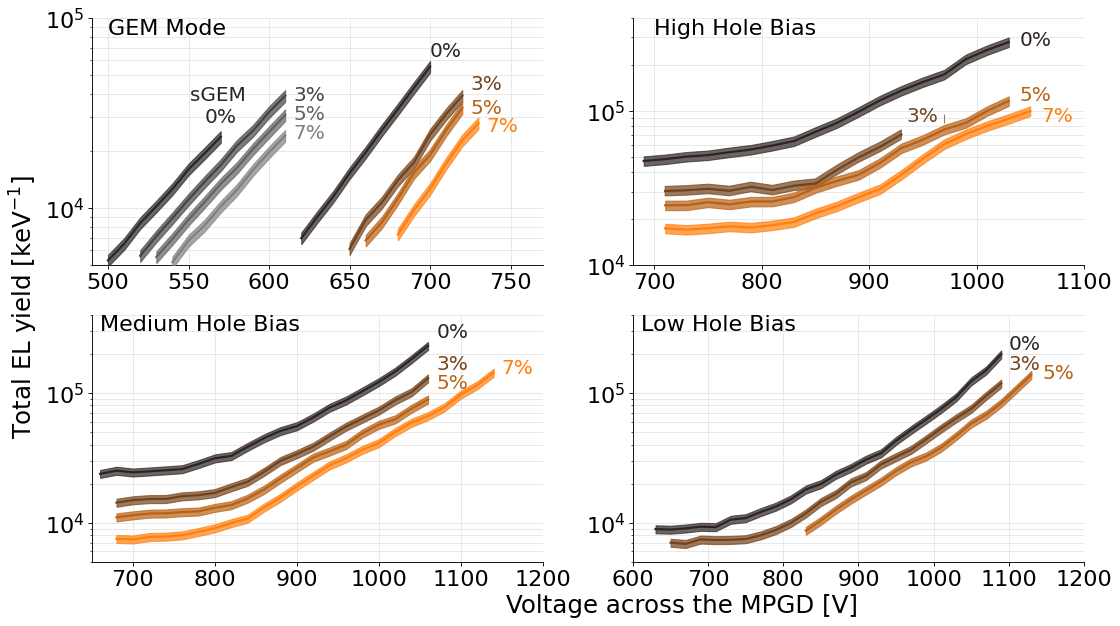

In [ ]:
#@title Light Yield
color = get_color(4, 'tab:orange')
color_gem = get_color(4, 'gray')

fig, (ax) = plt.subplots(2, 2, figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k') 

ax[0][0].grid(color=(0.9, 0.9, 0.9), which="both")
setup = 'GEM'
ax[0][0].plot(he40cf4_gem['GEM [V]'], he40cf4_gem['EL yield'], color=color_gem[0], lw=2, zorder=5)
ax[0][0].fill_between(he40cf4_gem['GEM [V]'], he40cf4_gem['EL yield']-he40cf4_gem['dEL yield'], 
                      he40cf4_gem['EL yield']+he40cf4_gem['dEL yield'], color=color_gem[0], alpha=0.7, zorder=5)
ax[0][0].text(570, 2.7e4, 'sGEM \n0%', fontsize=18, ha='center', va='bottom', color=color_gem[0])

ax[0][0].plot(he40cf43ch4_gem['GEM [V]'], he40cf43ch4_gem['EL yield'], color=color_gem[1], lw=2, zorder=5)
ax[0][0].fill_between(he40cf43ch4_gem['GEM [V]'], he40cf43ch4_gem['EL yield']-he40cf43ch4_gem['dEL yield'], 
                      he40cf43ch4_gem['EL yield']+he40cf43ch4_gem['dEL yield'], color=color_gem[1], alpha=0.7, zorder=5)
ax[0][0].text(625, 3.5e4, '3%', fontsize=18, ha='center', va='bottom', color=color_gem[1])

ax[0][0].plot(he40cf45ch4_gem['GEM [V]'], he40cf45ch4_gem['EL yield'], color=color_gem[2], lw=2, zorder=5)
ax[0][0].fill_between(he40cf45ch4_gem['GEM [V]'], he40cf45ch4_gem['EL yield']-he40cf45ch4_gem['dEL yield'], 
                      he40cf45ch4_gem['EL yield']+he40cf45ch4_gem['dEL yield'], color=color_gem[2], alpha=0.7, zorder=5)
ax[0][0].text(625, 2.8e4, '5%', fontsize=18, ha='center', va='bottom', color=color_gem[2])

ax[0][0].plot(he40cf47ch4_gem['GEM [V]'], he40cf47ch4_gem['EL yield'], color=color_gem[3], lw=2, zorder=5)
ax[0][0].fill_between(he40cf47ch4_gem['GEM [V]'], he40cf47ch4_gem['EL yield']-he40cf47ch4_gem['dEL yield'], 
                      he40cf47ch4_gem['EL yield']+he40cf47ch4_gem['dEL yield'], color=color_gem[3], alpha=0.7, zorder=5)
ax[0][0].text(625, 2.2e4, '7%', fontsize=18, ha='center', va='bottom', color=color_gem[3])

ax[0][0].plot(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']==setup], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup], lw=2, color=color[0], zorder=5)
ax[0][0].fill_between(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']==setup], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup]+he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']==setup],
                   he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup]-he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']==setup], color=color[0], alpha=0.7, zorder=5)
ax[0][0].text(700, 6e4, '0%', fontsize=18, ha='left', va='bottom', color=color[0])

ax[0][0].plot(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']==setup], he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']==setup], lw=2, color=color[1], zorder=5)
ax[0][0].fill_between(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']==setup], he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']==setup]+he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['Type']==setup],
                   he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']==setup]-he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['Type']==setup], color=color[1], alpha=0.7, zorder=5)
ax[0][0].text(725, 4e4, '3%', fontsize=18, ha='left', va='bottom', color=color[1])

ax[0][0].plot(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']==setup], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup], lw=2, color=color[2], zorder=5)
ax[0][0].fill_between(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']==setup], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup]+he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']==setup],
                   he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup]-he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']==setup], color=color[2], alpha=0.7, zorder=5)
ax[0][0].text(725, 3e4, '5%', fontsize=18, ha='left', va='bottom', color=color[2])

ax[0][0].plot(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']==setup], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup], lw=2, color=color[3], zorder=5)
ax[0][0].fill_between(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']==setup], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup]+he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']==setup],
                   he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup]-he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']==setup], color=color[3], alpha=0.7, zorder=5)
ax[0][0].text(735, 2.4e4, '7%', fontsize=18, ha='left', va='bottom', color=color[3])
ax[0][0].text(500, 1e5, 'GEM Mode', fontsize=20, ha='left', va='top', color='k')

ax[0][0].set_ylim(5e3, 1e5)
ax[0][0].spines["right"].set_visible(False)
ax[0][0].spines["top"].set_visible(False)
ax[1][0].set_ylabel('Total EL yield [keV$^{-1}$]', y=0.5, ha='left', fontsize=22)
ax[0][0].tick_params(axis='both', which='both', labelsize=20)
ax[0][0].set_xlim(490,770)
ax[0][0].semilogy()

ax[0][1].grid(color=(0.9, 0.9, 0.9), which="both")
setup = 'HIGH'
ax[0][1].plot(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']==setup], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup], lw=2, color=color[0], zorder=5)
ax[0][1].fill_between(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']==setup], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup]+he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']==setup],
                   he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup]-he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']==setup], color=color[0], alpha=0.7, zorder=5)
ax[0][1].text(1040, 2.5e5, '0%', fontsize=18, ha='left', va='bottom', color=color[0])

ax[0][1].plot(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']==setup], he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']==setup], lw=2, color=color[1], zorder=5)
ax[0][1].fill_between(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']==setup], he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']==setup]+he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['Type']==setup],
                   he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']==setup]-he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['Type']==setup], color=color[1], alpha=0.7, zorder=5)
ax[0][1].text(935, 8e4, '3%', fontsize=18, ha='left', va='bottom', color=color[1])

ax[0][1].plot(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']==setup], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup], lw=2, color=color[2], zorder=5)
ax[0][1].fill_between(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']==setup], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup]+he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']==setup],
                   he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup]-he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']==setup], color=color[2], alpha=0.7, zorder=5)
ax[0][1].text(1040, 1.1e5, '5%', fontsize=18, ha='left', va='bottom', color=color[2])

ax[0][1].plot(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']==setup], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup], lw=2, color=color[3], zorder=5)
ax[0][1].fill_between(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']==setup], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup]+he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']==setup],
                   he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup]-he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']==setup], color=color[3], alpha=0.7, zorder=5)
ax[0][1].text(1060, 8e4, '7%', fontsize=18, ha='left', va='bottom', color=color[3])
ax[0][1].text(700, 4e5, 'High Hole Bias', fontsize=20, ha='left', va='top', color='k')

ax[0][1].set_ylim(1e4, 4e5)
ax[0][1].spines["right"].set_visible(False)
ax[0][1].spines["top"].set_visible(False)
ax[0][1].tick_params(axis='both', which='both', labelsize=20)
ax[0][1].set_xlim(680,1100)
ax[0][1].semilogy()

ax[1][0].grid(color=(0.9, 0.9, 0.9), which="both")
setup = 'MEDIUM'
ax[1][0].plot(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']==setup], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup], lw=2, color=color[0], zorder=5)
ax[1][0].fill_between(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']==setup], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup]+he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']==setup],
                   he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup]-he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']==setup], color=color[0], alpha=0.7, zorder=5)
ax[1][0].text(1070, 2.5e5, '0%', fontsize=18, ha='left', va='bottom', color=color[0])

ax[1][0].plot(he40cf43ch4_cobra['COBRA [V]'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)], he40cf43ch4_cobra['EL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)], lw=2, color=color[1], zorder=5)
ax[1][0].fill_between(he40cf43ch4_cobra['COBRA [V]'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)], he40cf43ch4_cobra['EL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)]+he40cf43ch4_cobra['dEL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)],
                   he40cf43ch4_cobra['EL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)]-he40cf43ch4_cobra['dEL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)], color=color[1], alpha=0.7, zorder=5)
ax[1][0].text(1070, 1.4e5, '3%', fontsize=18, ha='left', va='bottom', color=color[1])

ax[1][0].plot(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']==setup], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup], lw=2, color=color[2], zorder=5)
ax[1][0].fill_between(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']==setup], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup]+he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']==setup],
                   he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup]-he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']==setup], color=color[2], alpha=0.7, zorder=5)
ax[1][0].text(1070, 1e5, '5%', fontsize=18, ha='left', va='bottom', color=color[2])

ax[1][0].plot(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']==setup], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup], lw=2, color=color[3], zorder=5)
ax[1][0].fill_between(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']==setup], he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup]+he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']==setup],
                   he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']==setup]-he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['Type']==setup], color=color[3], alpha=0.7, zorder=5)
ax[1][0].text(1150, 1.3e5, '7%', fontsize=18, ha='left', va='bottom', color=color[3])

ax[1][0].text(660, 4e5, 'Medium Hole Bias', fontsize=20, ha='left', va='top', color='k')

ax[1][0].set_ylim(5e3, 4e5)
ax[1][0].spines["right"].set_visible(False)
ax[1][0].spines["top"].set_visible(False)
ax[1][0].tick_params(axis='both', which='both', labelsize=20)
ax[1][0].set_xlim(650,1200)
ax[1][0].semilogy()

ax[1][1].grid(color=(0.9, 0.9, 0.9), which="both")
setup = 'LOW'
ax[1][1].plot(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']==setup], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup], lw=2, color=color[0], zorder=5)
ax[1][1].fill_between(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']==setup], he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup]+he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']==setup],
                   he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']==setup]-he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['Type']==setup], color=color[0], alpha=0.7, zorder=5)
ax[1][1].text(1100, 2e5, '0%', fontsize=18, ha='left', va='bottom', color=color[0])

ax[1][1].plot(he40cf43ch4_cobra['COBRA [V]'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)], he40cf43ch4_cobra['EL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)], lw=2, color=color[1], zorder=5)
ax[1][1].fill_between(he40cf43ch4_cobra['COBRA [V]'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)], he40cf43ch4_cobra['EL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)]+he40cf43ch4_cobra['dEL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)],
                   he40cf43ch4_cobra['EL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)]-he40cf43ch4_cobra['dEL yield'].loc[(he40cf43ch4_cobra['Type']==setup) & (he40cf43ch4_cobra['EL yield']>0)], color=color[1], alpha=0.7, zorder=5)
ax[1][1].text(1100, 1.4e5, '3%', fontsize=18, ha='left', va='bottom', color=color[1])

ax[1][1].plot(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']==setup], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup], lw=2, color=color[2], zorder=5)
ax[1][1].fill_between(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']==setup], he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup]+he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']==setup],
                   he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']==setup]-he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['Type']==setup], color=color[2], alpha=0.7, zorder=5)
ax[1][1].text(1145, 1.2e5, '5%', fontsize=18, ha='left', va='bottom', color=color[2])

ax[1][1].text(610, 4e5, 'Low Hole Bias', fontsize=20, ha='left', va='top', color='k')

ax[1][1].set_xlabel('Voltage across the MPGD [V]', y=0.5, ha='right', fontsize=22)
ax[1][1].set_ylim(5e3, 4e5)
ax[1][1].spines["right"].set_visible(False)
ax[1][1].spines["top"].set_visible(False)
ax[1][1].tick_params(axis='both', which='both', labelsize=20)
ax[1][1].set_xlim(600,1200)
ax[1][1].semilogy()

plt.show()

In [ ]:
#@title Maximum light and comparison with He-40%CF$_4$ sGEM
print('sGEM')
print('He-40%CF4', ufloat(he40cf4_gem['EL yield'].max().item(), he40cf4_gem['dEL yield'].loc[he40cf4_gem['EL yield']==he40cf4_gem['EL yield'].max()].item()))
print('3%CH4', ufloat(he40cf43ch4_gem['EL yield'].max().item(), he40cf43ch4_gem['dEL yield'].loc[he40cf43ch4_gem['EL yield']==he40cf43ch4_gem['EL yield'].max()].item()))
print('5%CH4', ufloat(he40cf45ch4_gem['EL yield'].max().item(), he40cf45ch4_gem['dEL yield'].loc[he40cf45ch4_gem['EL yield']==he40cf45ch4_gem['EL yield'].max()].item()))
print('7%CH4', ufloat(he40cf47ch4_gem['EL yield'].max().item(), he40cf47ch4_gem['dEL yield'].loc[he40cf47ch4_gem['EL yield']==he40cf47ch4_gem['EL yield'].max()].item()))

print('GEM-Mode')
print('He-40%CF4', ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='GEM'].max().item(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='GEM'].max()].item()))
print('3%CH4', ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='GEM'].max().item(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='GEM'].max()].item()))
print('5%CH4', ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='GEM'].max().item(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='GEM'].max()].item()))
print('7%CH4', ufloat(he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='GEM'].max().item(), he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['EL yield']==he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='GEM'].max()].item()))

print('Low Holes')
print('He-40%CF4', ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].max().item(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].max()].item()))
print('3%CH4', ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'].max().item(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'].max()].item()))
print('5%CH4', ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'].max().item(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'].max()].item()))

print('Medium')
print('He-40%CF4', ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].max().item(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].max()].item()))
print('3%CH4', ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'].max().item(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'].max()].item()))
print('5%CH4', ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'].max().item(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'].max()].item()))
print('7%CH4', ufloat(he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'].max().item(), he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['EL yield']==he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'].max()].item()))

print('High')
print('He-40%CF4', ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].max().item(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].max()].item()))
print('3%CH4', ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'].max().item(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'].max()].item()))
print('5%CH4', ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'].max().item(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'].max()].item()))
print('7%CH4', ufloat(he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'].max().item(), he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['EL yield']==he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'].max()].item()))

print('Full-COBRA')
print('He-40%CF4', ufloat(he40cf4_cobra['EL yield'].max().item(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].max()].item()))
print('3%CH4', ufloat(he40cf43ch4_cobra['EL yield'].max().item(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].max()].item()))
print('5%CH4', ufloat(he40cf45ch4_cobra['EL yield'].max().item(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].max()].item()))
print('7%CH4', ufloat(he40cf47ch4_cobra['EL yield'].max().item(), he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['EL yield']==he40cf47ch4_cobra['EL yield'].max()].item()))

print('COBRA Compared to the base mixture with sGEM')
print('3%CH4', he40cf43ch4_cobra['EL yield'].max()/he40cf4_gem['EL yield'].max())
print('5%CH4', he40cf45ch4_cobra['EL yield'].max()/he40cf4_gem['EL yield'].max())
print('7%CH4', he40cf47ch4_cobra['EL yield'].max()/he40cf4_gem['EL yield'].max())


sGEM
He-40%CF4 (2.37+/-0.17)e+04
3%CH4 (3.90+/-0.28)e+04
5%CH4 (3.09+/-0.22)e+04
7%CH4 (2.41+/-0.17)e+04
GEM-Mode
He-40%CF4 (5.6+/-0.4)e+04
3%CH4 (3.91+/-0.28)e+04
5%CH4 (3.37+/-0.24)e+04
7%CH4 (2.80+/-0.20)e+04
Low Holes
He-40%CF4 (1.98+/-0.14)e+05
3%CH4 (1.18+/-0.08)e+05
5%CH4 (1.38+/-0.10)e+05
Medium
He-40%CF4 (2.31+/-0.16)e+05
3%CH4 (1.30+/-0.09)e+05
5%CH4 (8.9+/-0.6)e+04
7%CH4 (1.43+/-0.10)e+05
High
He-40%CF4 (2.80+/-0.20)e+05
3%CH4 (8.9+/-0.6)e+04
5%CH4 (1.16+/-0.08)e+05
7%CH4 (1.00+/-0.07)e+05
Full-COBRA
He-40%CF4 (2.80+/-0.20)e+05
3%CH4 (1.30+/-0.09)e+05
5%CH4 (1.38+/-0.10)e+05
7%CH4 (1.43+/-0.10)e+05
COBRA Compared to the base mixture with sGEM
3%CH4 5.458863881847239
5%CH4 5.807372216872297
7%CH4 6.034778836889317


In [ ]:
print('Ratio Holes He-40%CF4')
print('Low:', ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].min(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].min()].item())/ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].max(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='LOW'].max()].item())*100)
print('Medium:', ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].min(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].min()].item())/ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].max(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='MEDIUM'].max()].item())*100)
print('High:', ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].min(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].min()].item())/ufloat(he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].max(), he40cf4_cobra['dEL yield'].loc[he40cf4_cobra['EL yield']==he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='HIGH'].max()].item())*100)

print()
print('Ratio Holes 3%CH4')
print('Low:', ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'].min(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'].min()].item())/ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'].max(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='LOW'].max()].item())*100)
print('Medium:', ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'].min(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'].min()].item())/ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'].max(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'].max()].item())*100)
print('High:', ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'].min(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'].min()].item())/ufloat(he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'].max(), he40cf43ch4_cobra['dEL yield'].loc[he40cf43ch4_cobra['EL yield']==he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='HIGH'].max()].item())*100)

print()
print('Ratio Holes 5%CH4')
print('Low:', ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'].min(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'].min()].item())/ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'].max(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='LOW'].max()].item())*100)
print('Medium:', ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'].min(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'].min()].item())/ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'].max(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='MEDIUM'].max()].item())*100)
print('High:', ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'].min(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'].min()].item())/ufloat(he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'].max(), he40cf45ch4_cobra['dEL yield'].loc[he40cf45ch4_cobra['EL yield']==he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='HIGH'].max()].item())*100)

print()
print('Ratio Holes 7%CH4')
print('Medium:', ufloat(he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'].min(), he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['EL yield']==he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'].min()].item())/ufloat(he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'].max(), he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['EL yield']==he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'].max()].item())*100)
print('High:', ufloat(he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'].min(), he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['EL yield']==he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'].min()].item())/ufloat(he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'].max(), he40cf47ch4_cobra['dEL yield'].loc[he40cf47ch4_cobra['EL yield']==he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='HIGH'].max()].item())*100)


Ratio Holes He-40%CF4
Low: 4.5+/-0.4
Medium: 10.3+/-1.0
High: 16.9+/-1.7

Ratio Holes 3%CH4
Low: 5.8+/-0.6
Medium: 11.0+/-1.1
High: 33.9+/-3.4

Ratio Holes 5%CH4
Low: 6.3+/-0.6
Medium: 12.4+/-1.2
High: 21.1+/-2.1

Ratio Holes 7%CH4
Medium: 5.2+/-0.5
High: 17.0+/-1.7


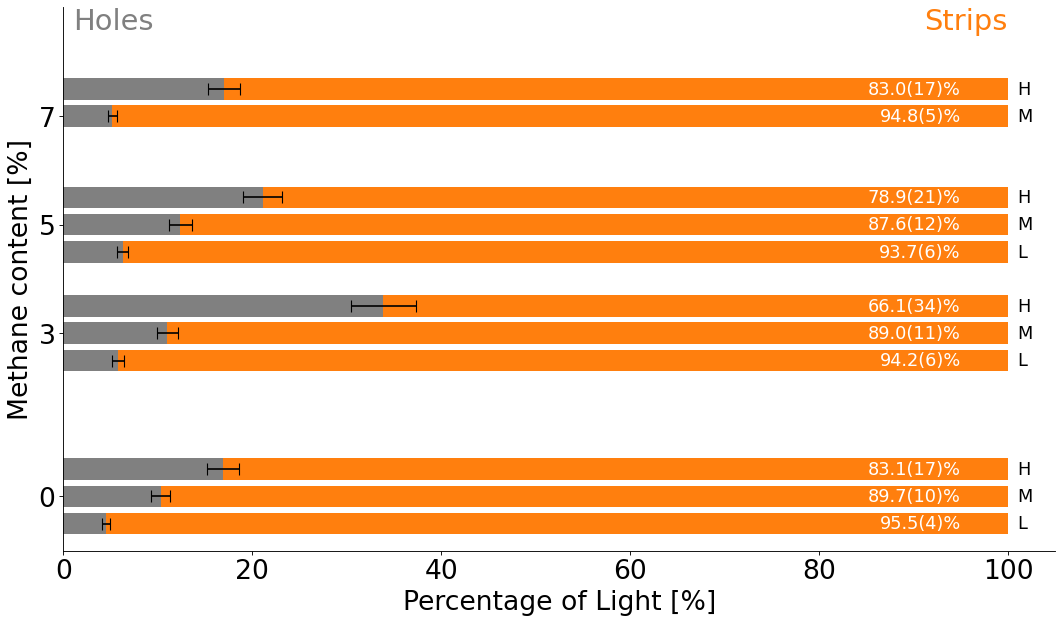

In [ ]:
#@title Light distribution in the holes and strips

ch4 = [-0.5, 0, 0.5, 2.5, 3, 3.5, 4.5, 5, 5.5, 7, 7.5]
holes = [4.5, 10.3, 16.9, 5.8, 11, 33.9, 6.3, 12.4, 21.1, 5.2, 17]
dholes = [0.4, 1, 1.7, 0.6, 1.1, 3.4, 0.6, 1.2, 2.1, 0.5, 1.7]
strips = np.ones(11)*100

fig, (ax) = plt.subplots(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k') 

plt.barh(ch4, strips, color='tab:orange', height=np.ones(11)*0.4)
plt.barh(ch4, holes, color='gray', xerr= dholes, height=np.ones(11)*0.4, capsize=5, lw=1.5)

plt.text(101, -0.5, 'L', fontsize=16, va='center', color='k', ha='left')
plt.text(95, -0.5, '95.5(4)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 0, 'M', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 0, '89.7(10)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 0.5, 'H', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 0.5, '83.1(17)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 2.5, 'L', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 2.5, '94.2(6)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 3, 'M', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 3, '89.0(11)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 3.5, 'H', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 3.5, '66.1(34)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 4.5, 'L', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 4.5, '93.7(6)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 5, 'M', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 5, '87.6(12)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 5.5, 'H', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 5.5, '78.9(21)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 7, 'M', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 7, '94.8(5)%', fontsize=16, va='center', color='w', ha='right')

plt.text(101, 7.5, 'H', fontsize=16, va='center', color='k', ha='left')
plt.text(95, 7.5, '83.0(17)%', fontsize=16, va='center', color='w', ha='right')

plt.text(1, 9, 'Holes', color='gray', fontsize=26, va='top', ha='left')
plt.text(100, 9, 'Strips', color='tab:orange', fontsize=26, va='top', ha='right')

ax.set_yticks([0, 3, 5, 7])

ax.set_ylim(-1, 9)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel('Methane content [%]', y=0.5, ha='center', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='both', labelsize=24)

ax.set_xlabel('Percentage of Light [%]', y=0.5, ha='center', fontsize=24)

plt.show()

In [ ]:
he40cf4_cobra['EL/charge'] = 5.89*he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']=='GEM']/he40cf4_cobra['CAT electrons'].loc[he40cf4_cobra['Type']=='GEM']
he40cf43ch4_cobra['EL/charge'] = 5.89*he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']=='GEM']/he40cf43ch4_cobra['CAT electrons'].loc[he40cf43ch4_cobra['Type']=='GEM']
he40cf45ch4_cobra['EL/charge'] = 5.89*he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']=='GEM']/he40cf45ch4_cobra['CAT electrons'].loc[he40cf45ch4_cobra['Type']=='GEM']
he40cf47ch4_cobra['EL/charge'] = 5.89*he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']=='GEM']/he40cf47ch4_cobra['CAT electrons'].loc[he40cf47ch4_cobra['Type']=='GEM']

he40cf4_cobra['EL/charge'].loc[he40cf4_cobra['Type']!='GEM'] = 5.89*he40cf4_cobra['EL yield'].loc[he40cf4_cobra['Type']!='GEM']/he40cf4_cobra['AND electrons'].loc[he40cf4_cobra['Type']!='GEM']
he40cf43ch4_cobra['EL/charge'].loc[he40cf43ch4_cobra['Type']!='GEM'] = 5.89*he40cf43ch4_cobra['EL yield'].loc[he40cf43ch4_cobra['Type']!='GEM']/he40cf43ch4_cobra['AND electrons'].loc[he40cf43ch4_cobra['Type']!='GEM']
he40cf45ch4_cobra['EL/charge'].loc[he40cf45ch4_cobra['Type']!='GEM'] = 5.89*he40cf45ch4_cobra['EL yield'].loc[he40cf45ch4_cobra['Type']!='GEM']/he40cf45ch4_cobra['AND electrons'].loc[he40cf45ch4_cobra['Type']!='GEM']
he40cf47ch4_cobra['EL/charge'].loc[he40cf47ch4_cobra['Type']!='GEM'] = 5.89*he40cf47ch4_cobra['EL yield'].loc[he40cf47ch4_cobra['Type']!='GEM']/he40cf47ch4_cobra['AND electrons'].loc[he40cf47ch4_cobra['Type']!='GEM']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


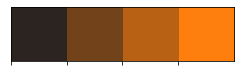

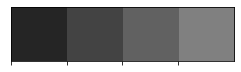

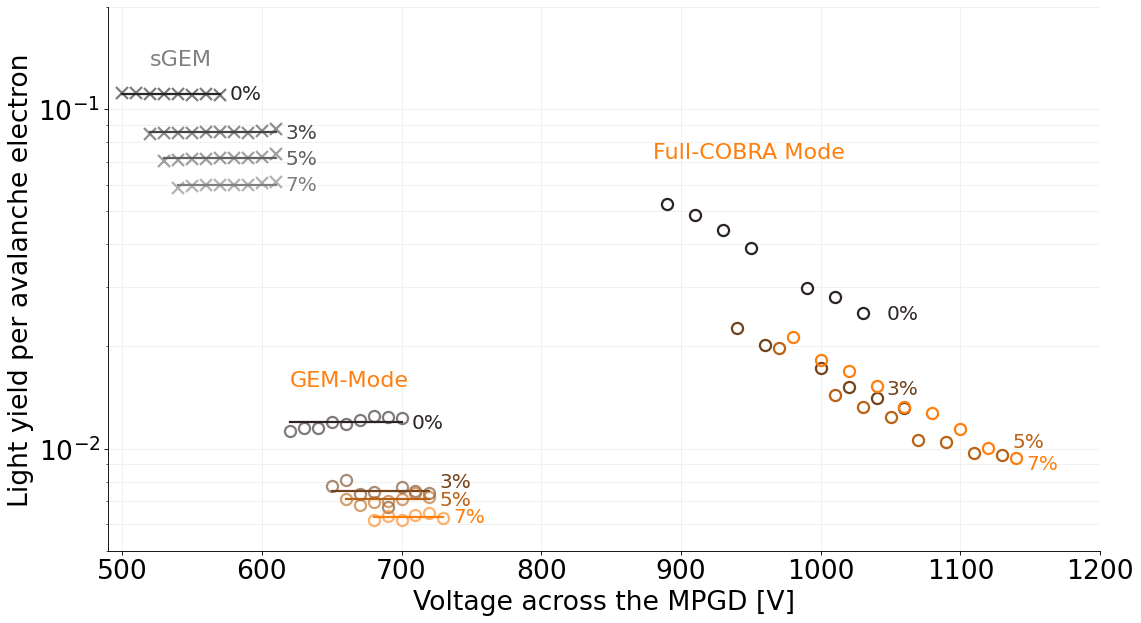

In [ ]:
color = get_color(4, 'tab:orange')
color_gem = get_color(4, 'gray')

fig, (ax) = plt.subplots(figsize=(16, 9), dpi= 80, facecolor='w', edgecolor='k') 

#He-40%CF4
plt.plot(he40cf4_gem['GEM [V]'], he40cf4_gem['EL/charge'], color='none', marker='x', markersize=10,
         markeredgecolor=color_gem[0], markeredgewidth=2, label='0% CH4', alpha=0.6)
plt.plot(he40cf4_gem['GEM [V]'], np.ones(len(he40cf4_gem['GEM [V]']))*he40cf4_gem['EL/charge'].mean(), lw=2, color=color_gem[0])
ax.text(600, he40cf4_gem['EL/charge'].mean(), '0%', fontsize=18, ha='right', va='center', color=color_gem[0])

plt.plot(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM'], he40cf4_cobra['EL/charge'].loc[he40cf4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10,
         markeredgecolor=color[0], markeredgewidth=2, label='0% CH4', alpha=0.6)
ax.text(730, he40cf4_cobra['EL/charge'].loc[he40cf4_cobra['Type']=='GEM'].mean(), '0%', fontsize=18, ha='right', va='center', color=color[0])

plt.plot(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM'], 
         np.ones(len(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='GEM']))*he40cf4_cobra['EL/charge'].loc[he40cf4_cobra['Type']=='GEM'].mean(), lw=2, color=color[0])
plt.plot(he40cf4_cobra['COBRA [V]'].loc[he40cf4_cobra['Type']=='HIGH'], he40cf4_cobra['EL/charge'].loc[he40cf4_cobra['Type']=='HIGH'], color='none', marker='o', markersize=10,
         markeredgecolor=color[0], markeredgewidth=2)
ax.text(1070, 2.5e-2, '0%', fontsize=18, ha='right', va='center', color=color[0])

#3%CH4
plt.plot(he40cf43ch4_gem['GEM [V]'], he40cf43ch4_gem['EL/charge'], color='none', marker='x', markersize=10,
         markeredgecolor=color_gem[1], markeredgewidth=2, label='0% CH4', alpha=0.6)
plt.plot(he40cf43ch4_gem['GEM [V]'], np.ones(len(he40cf43ch4_gem['GEM [V]']))*he40cf43ch4_gem['EL/charge'].mean(), lw=2, color=color_gem[1])
ax.text(640, he40cf43ch4_gem['EL/charge'].mean(), '3%', fontsize=18, ha='right', va='center', color=color_gem[1])

plt.plot(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='GEM'], he40cf43ch4_cobra['EL/charge'].loc[he40cf43ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10,
         markeredgecolor=color[1], markeredgewidth=2, label='0% CH4', alpha=0.6)
plt.plot(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='GEM'], 
         np.ones(len(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='GEM']))*he40cf43ch4_cobra['EL/charge'].loc[he40cf43ch4_cobra['Type']=='GEM'].mean(), lw=2, color=color[1])
ax.text(750, he40cf43ch4_cobra['EL/charge'].loc[he40cf43ch4_cobra['Type']=='GEM'].mean()+0.0005, '3%', fontsize=18, ha='right', va='center', color=color[1])

plt.plot(he40cf43ch4_cobra['COBRA [V]'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'], he40cf43ch4_cobra['EL/charge'].loc[he40cf43ch4_cobra['Type']=='MEDIUM'], color='none', marker='o', markersize=10,
         markeredgecolor=color[1], markeredgewidth=2)
ax.text(1070, 1.5e-2, '3%', fontsize=18, ha='right', va='center', color=color[1])

#5%CH4
plt.plot(he40cf45ch4_gem['GEM [V]'], he40cf45ch4_gem['EL/charge'], color='none', marker='x', markersize=10,
         markeredgecolor=color_gem[2], markeredgewidth=2, label='0% CH4', alpha=0.6)
plt.plot(he40cf45ch4_gem['GEM [V]'], np.ones(len(he40cf45ch4_gem['GEM [V]']))*he40cf45ch4_gem['EL/charge'].mean(), lw=2, color=color_gem[2])
ax.text(640, he40cf45ch4_gem['EL/charge'].mean(), '5%', fontsize=18, ha='right', va='center', color=color_gem[2])

plt.plot(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='GEM'], he40cf45ch4_cobra['EL/charge'].loc[he40cf45ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10,
         markeredgecolor=color[2], markeredgewidth=2, label='0% CH4', alpha=0.6)
plt.plot(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='GEM'], 
         np.ones(len(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='GEM']))*he40cf45ch4_cobra['EL/charge'].loc[he40cf45ch4_cobra['Type']=='GEM'].mean(), lw=2, color=color[2])
ax.text(750, he40cf45ch4_cobra['EL/charge'].loc[he40cf45ch4_cobra['Type']=='GEM'].mean(), '5%', fontsize=18, ha='right', va='center', color=color[2])
plt.plot(he40cf45ch4_cobra['COBRA [V]'].loc[he40cf45ch4_cobra['Type']=='LOW'], he40cf45ch4_cobra['EL/charge'].loc[he40cf45ch4_cobra['Type']=='LOW'], color='none', marker='o', markersize=10,
         markeredgecolor=color[2], markeredgewidth=2)
ax.text(1160, 1.05e-2, '5%', fontsize=18, ha='right', va='center', color=color[2])

#7%CH4
plt.plot(he40cf47ch4_gem['GEM [V]'], he40cf47ch4_gem['EL/charge'], color='none', marker='x', markersize=10,
         markeredgecolor=color_gem[3], markeredgewidth=2, label='0% CH4', alpha=0.6)
plt.plot(he40cf47ch4_gem['GEM [V]'], np.ones(len(he40cf47ch4_gem['GEM [V]']))*he40cf47ch4_gem['EL/charge'].mean(), lw=2, color=color_gem[3])
ax.text(640, he40cf47ch4_gem['EL/charge'].mean(), '7%', fontsize=18, ha='right', va='center', color=color_gem[3])

plt.plot(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='GEM'], he40cf47ch4_cobra['EL/charge'].loc[he40cf47ch4_cobra['Type']=='GEM'], color='none', marker='o', markersize=10,
         markeredgecolor=color[3], markeredgewidth=2, label='0% CH4', alpha=0.6)
plt.plot(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='GEM'], 
         np.ones(len(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='GEM']))*he40cf47ch4_cobra['EL/charge'].loc[he40cf47ch4_cobra['Type']=='GEM'].mean(), lw=2, color=color[3])
ax.text(760, he40cf47ch4_cobra['EL/charge'].loc[he40cf47ch4_cobra['Type']=='GEM'].mean(), '7%', fontsize=18, ha='right', va='center', color=color[3])

plt.plot(he40cf47ch4_cobra['COBRA [V]'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'], he40cf47ch4_cobra['EL/charge'].loc[he40cf47ch4_cobra['Type']=='MEDIUM'], color='none', marker='o', markersize=10,
         markeredgecolor=color[3], markeredgewidth=2)
ax.text(1170, 9e-3, '7%', fontsize=18, ha='right', va='center', color=color[3])

ax.text(520, 1.5e-1, 'sGEM', fontsize=20, ha='left', va='top', color='gray')
ax.text(620, 1.7e-2, 'GEM-Mode', fontsize=20, ha='left', va='top', color='tab:orange')
ax.text(880, 8e-2, 'Full-COBRA Mode', fontsize=20, ha='left', va='top', color='tab:orange')

ax.grid(color=(0.94, 0.94, 0.94), which="both")
ax.set_ylim(5e-3, 2e-1)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_ylabel('Light yield per avalanche electron', y=0.5, ha='center', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=24)
ax.semilogy()
ax.set_xlabel('Voltage across the MPGD [V]', y=0.5, ha='center', fontsize=24)
ax.set_xlim(490,1200)
plt.show()

In [ ]:
print('Ratio EL/charge GEM-Mode/sGEM')
print('He-40%CF4:', he40cf4_cobra['EL/charge'].mean()/he40cf4_gem['EL/charge'].mean()*100)
print('3%CH4:', he40cf43ch4_cobra['EL/charge'].mean()/he40cf43ch4_gem['EL/charge'].mean()*100)
print('5%CH4:', he40cf45ch4_cobra['EL/charge'].mean()/he40cf45ch4_gem['EL/charge'].mean()*100)
print('7%CH4:', he40cf47ch4_cobra['EL/charge'].mean()/he40cf47ch4_gem['EL/charge'].mean()*100)

Ratio EL/charge GEM-Mode/sGEM
He-40%CF4: 10.759401683262931
3%CH4: 8.75738584327526
5%CH4: 9.870517007832833
7%CH4: 10.489083265007933


In [ ]:
np.mean([10.759401683262931, 8.75738584327526, 9.870517007832833, 10.489083265007933])

9.96909694984474